In [1]:

# A library for plotting graphs
library(ggplot2)
# devtools::install_github('Mikata-Project/ggthemr')
library(readr)
library(reshape2)


# rq3.plot.data <- read_csv("RQ3_qt_RF_explanation_eval_split_rulefit_condition.csv")
rq3.plot.data <- read_csv("RQ3_openstack_RF_guidance_eval_split_rulefit_condition.csv")




── Column specification ────────────────────────────────────────────────────────
cols(
  project = col_character(),
  commit_id = col_character(),
  method = col_character(),
  global_model = col_character(),
  guidance = col_character(),
  precision = col_double(),
  recall = col_double()
)




In [2]:
str(rq3.plot.data)

tibble [1,761 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ project     : chr [1:1761] "openstack" "openstack" "openstack" "openstack" ...
 $ commit_id   : chr [1:1761] "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" ...
 $ method      : chr [1:1761] "PyExpFlip" "PyExpFlip" "PyExpFlip" "PyExpG2" ...
 $ global_model: chr [1:1761] "RF" "RF" "RF" "RF" ...
 $ guidance    : chr [1:1761] "la <= 3.4800000190734863" "age > 12.769999980926514" "age <= 0.5099999904632568" "nrev > 1.8299999833106995" ...
 $ precision   : num [1:1761] 0.976 0.882 0.865 0.805 0.837 ...
 $ recall      : num [1:1761] 0.285 0.311 0.187 0.724 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   project = col_character(),
  ..   commit_id = col_character(),
  ..   method = col_character(),
  ..   global_model = col_character(),
  ..   guidance = col_character(),
  ..   precision = col_double(),
  ..   rec

In [3]:
names(rq3.plot.data)[4] <- 'model'

In [4]:

rq3.plot.data <- melt(rq3.plot.data)

Using project, commit_id, method, model, guidance as id variables



In [5]:
str(rq3.plot.data)

'data.frame':	3522 obs. of  7 variables:
 $ project  : chr  "openstack" "openstack" "openstack" "openstack" ...
 $ commit_id: chr  "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" ...
 $ method   : chr  "PyExpFlip" "PyExpFlip" "PyExpFlip" "PyExpG2" ...
 $ model    : chr  "RF" "RF" "RF" "RF" ...
 $ guidance : chr  "la <= 3.4800000190734863" "age > 12.769999980926514" "age <= 0.5099999904632568" "nrev > 1.8299999833106995" ...
 $ variable : Factor w/ 2 levels "precision","recall": 1 1 1 1 1 1 1 1 1 1 ...
 $ value    : num  0.976 0.882 0.865 0.805 0.837 ...


In [6]:
g <- ggplot(data = rq3.plot.data, aes(x= model, y=value, fill = (method))) +
  geom_boxplot() +
  ylab('') + xlab('') + ggtitle('')  +
  facet_grid(variable~project) + labs(fill = "") + theme_bw() + labs(fill = "") + theme(legend.position = 'top') +  coord_cartesian(ylim=c(0, 1)) + 
  theme(text = element_text(size = 14),
        strip.text.y = element_text(size = 10))

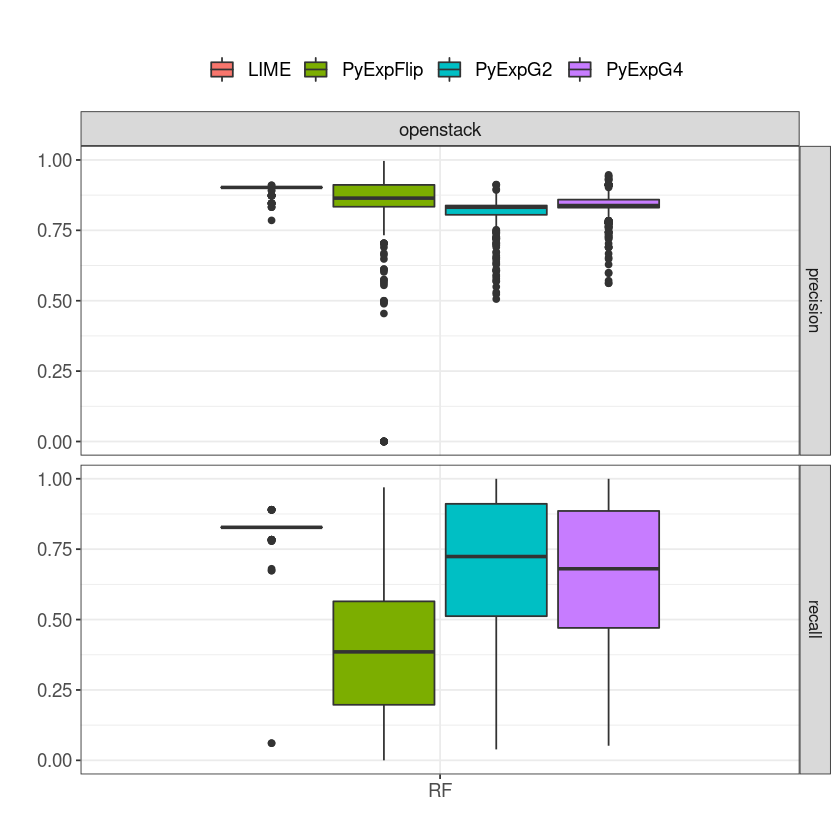

In [7]:
g

In [82]:
str(rq3.plot.data)

'data.frame':	3522 obs. of  7 variables:
 $ project  : chr  "openstack" "openstack" "openstack" "openstack" ...
 $ commit_id: chr  "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" "1e6973aee7137653c62dcef970b1e2527b50517d" ...
 $ method   : chr  "PyExpFlip" "PyExpFlip" "PyExpFlip" "PyExpG2" ...
 $ model    : chr  "RF" "RF" "RF" "RF" ...
 $ guidance : chr  "la <= 3.4800000190734863" "age > 12.769999980926514" "age <= 0.5099999904632568" "nrev > 1.8299999833106995" ...
 $ variable : Factor w/ 2 levels "precision","recall": 1 1 1 1 1 1 1 1 1 1 ...
 $ value    : num  0.976 0.882 0.865 0.805 0.837 ...


In [8]:
c.data <- split(rq3.plot.data, rq3.plot.data$method)

In [9]:
lapply(c.data, function(x){
    length(unique(x$commit_id))
})

$LIME
[1] 198

$PyExpFlip
[1] 198

$PyExpG2
[1] 198

$PyExpG4
[1] 198

In [50]:
rq3.plot.data$index <- paste0(rq3.plot.data$method, rq3.plot.data$commit_id)

In [51]:
c.data <- split(rq3.plot.data, rq3.plot.data$index)

In [52]:
c.data <- do.call(rbind, lapply(c.data, function(x) { x[1, ]}))

In [53]:
str(c.data)

'data.frame':	127 obs. of  8 variables:
 $ project    : chr  "qt" "qt" "qt" "qt" ...
 $ commit_id  : chr  "06eaeb0ac8d861cf3e60b11a8fbbabdeef1d6759" "07860794da5863610f38295c9d517fc457c5de95" "097b0a531642f79d8b240f89ca1eacca2ee59a5e" "0ed9f7496656fa0ea52d703c7fddff26c2192857" ...
 $ method     : chr  "LIME" "LIME" "LIME" "LIME" ...
 $ model      : chr  "RF" "RF" "RF" "RF" ...
 $ explanation: chr  "la > 31.00" "la > 31.00" "la > 31.00" "la > 31.00" ...
 $ variable   : Factor w/ 2 levels "precision","recall": 1 1 1 1 1 1 1 1 1 1 ...
 $ value      : num  0.144 0.144 0.144 0.144 0.144 ...
 $ index      : chr  "LIME06eaeb0ac8d861cf3e60b11a8fbbabdeef1d6759" "LIME07860794da5863610f38295c9d517fc457c5de95" "LIME097b0a531642f79d8b240f89ca1eacca2ee59a5e" "LIME0ed9f7496656fa0ea52d703c7fddff26c2192857" ...


In [54]:
table(c.data$method)


       LIME pyExplainer 
         48          79 

In [35]:
length(unique(rq3.plot.data$commit_id))

[1] 79

In [38]:
c.data.l <- subset(rq3.plot.data, method == 'LIME')

In [40]:
unique(c.data.l$guidance)

[1] "la <= 31.00"               "hcmt > 1.00"              
[3] "0.00 >= ent or ent > 0.29"